In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
df_meteo = pd.read_csv("weather.csv")

In [28]:
df_meteo

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<Axes: >

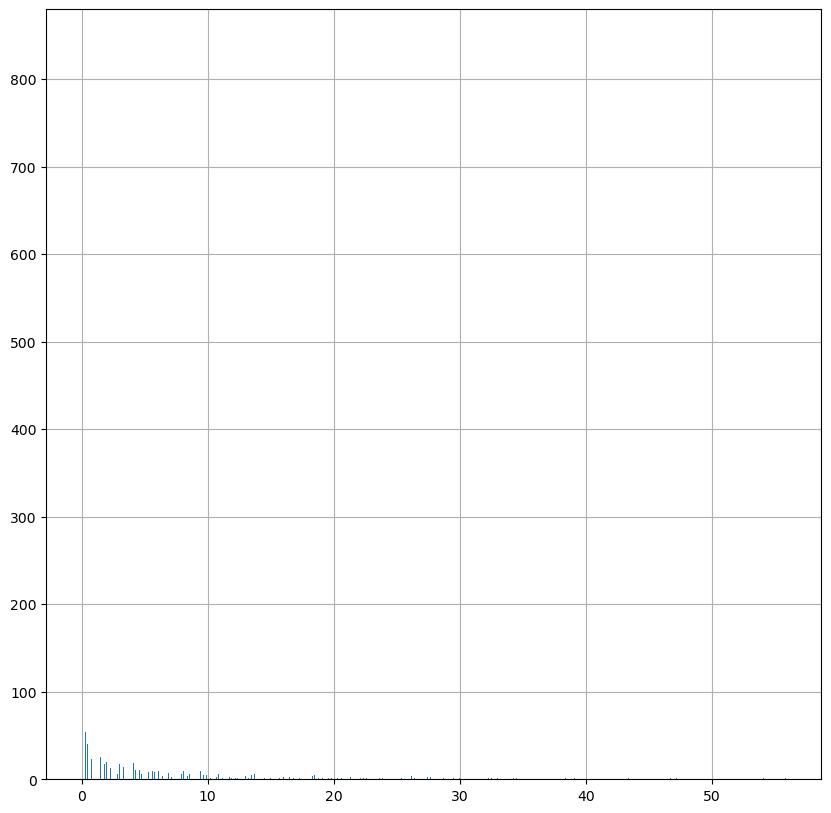

In [29]:
df_meteo['precipitation'].hist(bins = 1000, figsize=(10,10))

In [30]:
df_meteo = df_meteo.drop(df_meteo[df_meteo['precipitation'] > 25].index)

In [31]:
std_precipitations = df_meteo['precipitation'].std()
std_precipitations

4.5490430363181416

In [32]:
mean_precipitations = df_meteo['precipitation'].mean()
mean_precipitations

2.2939733707077785

In [33]:
max(df_meteo['precipitation'])

23.9

In [34]:
df_meteo = df_meteo.drop(df_meteo[df_meteo['precipitation'] > (mean_precipitations + 3*std_precipitations)].index)

In [36]:
df_meteo

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<Axes: >

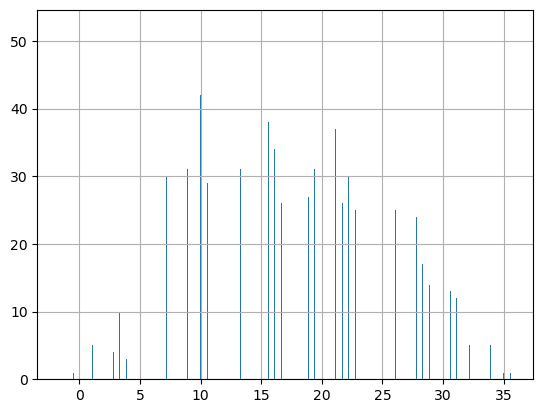

In [39]:
df_meteo['temp_max'].hist(bins = 1000)

In [40]:
max(df_meteo['temp_max'])

35.6

In [42]:
std_tmax = df_meteo['temp_max'].std()
std_tmax

7.456768377598997

In [44]:
mean_tmax = df_meteo['temp_max'].mean()
mean_tmax

16.631544597534447

In [45]:
df_meteo = df_meteo.drop(df_meteo[df_meteo['temp_max'] > (mean_tmax + 3*std_tmax)].index)

In [46]:
df_meteo = df_meteo.drop(df_meteo[df_meteo['temp_max'] < (mean_tmax - 3*std_tmax)].index)

<Axes: >

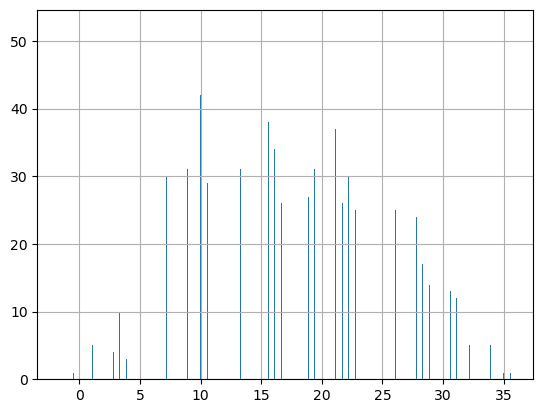

In [47]:
df_meteo['temp_max'].hist(bins = 1000)

In [48]:
df_meteo

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<Axes: >

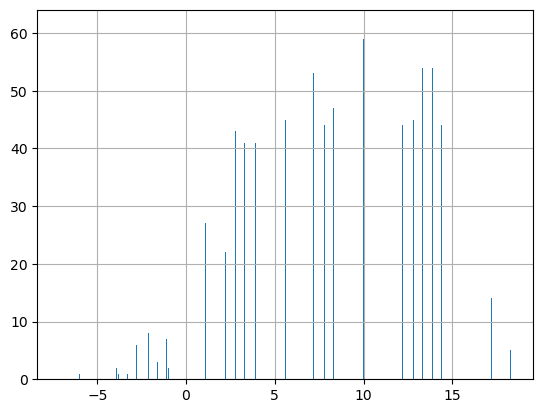

In [49]:
df_meteo['temp_min'].hist(bins = 1000)

In [50]:
std_tmin = df_meteo['temp_min'].std()
mean_tmin = df_meteo['temp_min'].mean()

In [51]:
df_meteo = df_meteo.drop(df_meteo[df_meteo['temp_min'] > (mean_tmin + 3*std_tmin)].index)
df_meteo = df_meteo.drop(df_meteo[df_meteo['temp_min'] > (mean_tmin + 3*std_tmin)].index)

In [52]:
std_wind = df_meteo['wind'].std()
mean_wind = df_meteo['wind'].mean()

In [53]:
df_meteo = df_meteo.drop(df_meteo[df_meteo['wind'] > (mean_wind + 3*std_wind)].index)
df_meteo = df_meteo.drop(df_meteo[df_meteo['wind'] > (mean_wind + 3*std_wind)].index)

In [54]:
df_meteo

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [55]:
codes, uniques = pd.factorize(df_meteo['weather'])

In [56]:
codes

array([0, 1, 1, ..., 4, 2, 2])

In [57]:
uniques

Index(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype='object')

In [58]:
df_meteo['weather_fact'] = np.array(codes)

In [59]:
df_meteo

,date,precipitation,temp_max,temp_min,wind,weather,weather_fact
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1
5,2012-01-06,2.5,4.4,2.2,2.2,rain,1
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,1
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,1
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,4
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2


In [63]:
#Linear regression
X = pd.DataFrame()

X["precipitations"] = df_meteo['precipitation']
X["temp_max"] = df_meteo['temp_max']
X["temp_min"] = df_meteo['temp_min']
X["wind"] = df_meteo['wind']

y = pd.DataFrame()
y['output'] = df_meteo['weather_fact']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_predict = model.predict(x_test)
print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))



0.16225655114194504
0.5103014270152283
0.6399218363789809


In [65]:
# MLPRegressor
X = pd.DataFrame()

X["precipitations"] = df_meteo['precipitation']
X["temp_max"] = df_meteo['temp_max']
X["temp_min"] = df_meteo['temp_min']
X["wind"] = df_meteo['wind']

y = pd.DataFrame()
y['output'] = df_meteo['weather_fact']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = MLPRegressor(random_state=0)

model.fit(X_train, y_train)

y_predict = model.predict(x_test)
print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))

/Users/andreisandor/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.27729506344523647
0.41568803946427685
0.552048089174183


In [66]:
# DecisionTreeRegressor
X = pd.DataFrame()

X["precipitations"] = df_meteo['precipitation']
X["temp_max"] = df_meteo['temp_max']
X["temp_min"] = df_meteo['temp_min']
X["wind"] = df_meteo['wind']

y = pd.DataFrame()
y['output'] = df_meteo['weather_fact']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeRegressor(random_state=0)

model.fit(X_train, y_train)

y_predict = model.predict(x_test)
print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))

-0.5728789741788161
0.4981684981684982
1.2014652014652014


In [67]:
# RandomForestRegressor
X = pd.DataFrame()

X["precipitations"] = df_meteo['precipitation']
X["temp_max"] = df_meteo['temp_max']
X["temp_min"] = df_meteo['temp_min']
X["wind"] = df_meteo['wind']

y = pd.DataFrame()
y['output'] = df_meteo['weather_fact']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(random_state=0)

model.fit(X_train, y_train)

y_predict = model.predict(x_test)
print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))

0.1523939595175362
0.4291550671550672
0.6474555124135124


/var/folders/zp/j6n5zjwx4g184f0x4g1j4llc0000gn/T/ipykernel_91216/3393905994.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
